In [1]:
import matplotlib.pyplot as plt
import sys

sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
import sbdynt as sbd


# *Proper Element calculations for TNOs*

This notebook demonstrates how to do a standard set of integrations for a TNO that includes calculating synthetic proper elements. Note that this also runs the machine learning classification for the TNO (because that information is used by the proper elements routine). See the TNO-classification-with-machine-learning notebook for more about that. 

**Note** The proper elements routine is still in developement (develeopment led by Dallin Spencer), so there will be changes to the algorithm over time! The proper elements calcaultion will also be available for objects besides TNOs, but the helper routines for non-TNO populations have not been incopororated into the main branch just yet. Details on the final implementaiton of the synthetic proper elements calculation will be published by Spencer et al., and will be linked in future updated example notebooks!

The function sbd.**run_tno** will return a python class that includes the machine learning and proper element results based on a default integration setup. The default behavior is to integrate the best-fit orbit and two clones representing 3-sigma deviations in semimajor axis based on JPL's orbit fit covariance matrix. You can also use the **clones** parameter to specify how many clones you would like to generate in a Gaussian manner from that covariance matrix. **Warning** the proper elements calculation requires a 100 Myr integration, so it will take quite a while if you specify a large number of clones!! It takes several minutes even for the default 3-clone-run



In [2]:
tno = 'K13GD7C'
results = sbd.run_tno(des=tno,datadir='outputs-from-example-notebooks',
                      deletefile=True)

results.proper_elements.print_results()

Clone number, proper a, proper e, proper sini:

0, 4.322769e+01, 4.062997e-02, 3.113241e-02
1, 4.319952e+01, 3.460552e-02, 3.030510e-02
2, 4.325690e+01, 4.225922e-02, 3.132478e-02


The full time-series of the original and filtered proper eccentricity and inclinations are returned. We will soon have some nice plotting scripts built-in for these, but you can access those and plot them yourself as below:

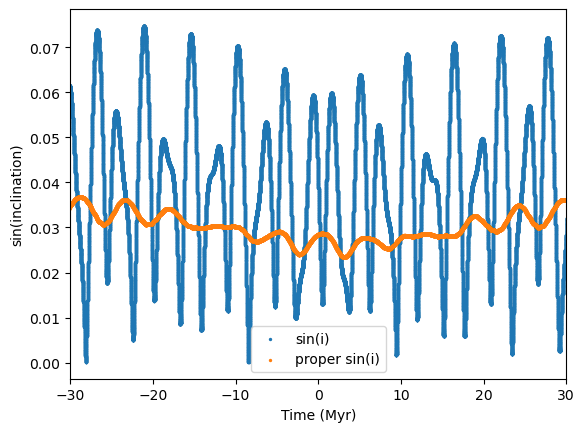

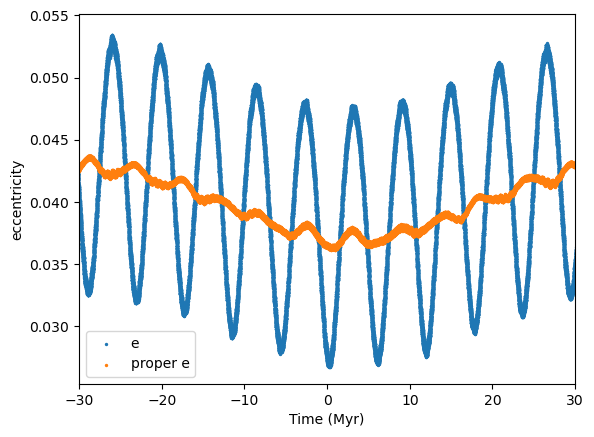

In [5]:
plt.scatter(results.proper_elements.time/1e6,
            results.proper_elements.original_sini[0],label='sin(i)',s=2)
plt.scatter(results.proper_elements.time/1e6,
            results.proper_elements.filtered_sini[0],label='proper sin(i)',s=2)

plt.xlim([-30,30])
plt.xlabel('Time (Myr)')
plt.ylabel('sin(inclination)')
plt.legend();
plt.show()
plt.scatter(results.proper_elements.time/1e6,
            results.proper_elements.original_ecc[0],label='e',s=2)
plt.scatter(results.proper_elements.time/1e6,
            results.proper_elements.filtered_ecc[0],label='proper e',s=2)

plt.xlim([-30,30])
plt.xlabel('Time (Myr)')
plt.ylabel('eccentricity')
plt.legend();

plt.show()


If you've already run the integration from the command above and just want to re-calculate the proper elements from the saved simulation archives, you can do that using the sbd.**calc_proper_elements** command and providing the saved archivefile:

In [6]:
tno = 'K13GD7C'
archivefile = 'outputs-from-example-notebooks/K13GD7C-simarchive.bin'
flag, proper_elements = sbd.calc_proper_elements(des=tno,archivefile=archivefile,return_timeseries=True)